In [1]:
!pip install requests beautifulsoup4


✅ Total Jobs Loaded: 956

📍 Top 5 Locations:
 Location
New York, NY         78
San Francisco, CA    71
Cambridge, MA        59
Chicago, IL          37
Boston, MA           24
Name: count, dtype: int64 

🛠 Most In-Demand Skills:
 [('and', 30330), ('to', 16225), ('the', 12561), ('of', 12112), ('data', 9968), ('in', 9085), ('a', 8298), ('with', 7482), ('for', 5517), ('experience', 4815)] 



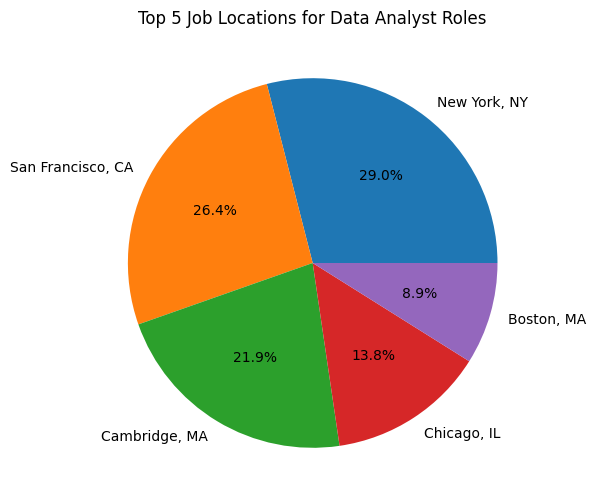

📁 Data saved to data_analyst_jobs_kaggle.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# Use a Kaggle dataset (e.g., Data Science Job Postings)
url = "https://raw.githubusercontent.com/PlayingNumbers/ds_salary_proj/master/glassdoor_jobs.csv"
df = pd.read_csv(url)

# Keep only required columns
df = df[['Job Title', 'Company Name', 'Location', 'Salary Estimate', 'Job Description']]

# Rename columns for consistency
df.rename(columns={
    'Job Title': 'Title',
    'Company Name': 'Company',
    'Location': 'Location',
    'Salary Estimate': 'Salary',
    'Job Description': 'Skills'
}, inplace=True)

# Clean Skills text
df['Skills'] = df['Skills'].fillna("").apply(lambda x: re.sub(r'[\n\r\t•]', ' ', x))

print(f"✅ Total Jobs Loaded: {len(df)}\n")

# --- Top Locations ---
top_locations = df['Location'].value_counts().head(5)
print("Top 5 Locations:\n", top_locations, "\n")

# --- Skills Analysis ---
all_skills = " ".join(df['Skills'].tolist()).lower()
skills_list = re.findall(r'\b\w+\b', all_skills)
top_skills = Counter(skills_list).most_common(10)
print("🛠 Most In-Demand Skills:\n", top_skills, "\n")

# --- Visualization (Pie Chart) ---
if not top_locations.empty:
    plt.figure(figsize=(6, 6))
    top_locations.plot(kind='pie', autopct='%1.1f%%')
    plt.title("Top 5 Job Locations for Data Analyst Roles")
    plt.ylabel("")
    plt.show()
else:
    print("⚠️ No location data available to plot.")

df.to_csv("data_analyst_jobs_kaggle.csv", index=False)
print("📁 Data saved to data_analyst_jobs_kaggle.csv")
